# **결론 : 홈런이 많은 타자를 중심타선에 배치하면 추정득점이 증가한다**

# 라이브러리

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
from matplotlib import rc
from scipy.stats import pearsonr
from matplotlib.font_manager import FontProperties

In [ ]:
# 1. 폰트 업로드
from google.colab import files
uploaded = files.upload()

Saving KBO Dia Gothic_medium.ttf to KBO Dia Gothic_medium.ttf


In [ ]:
# 업로드된 파일 목록 확인
for file_name in uploaded.keys():
    print(f"Uploaded file: {file_name}")

# 파일 경로 확인
# 예를 들어 첫 번째 업로드된 파일의 경로를 얻기 위해서는:
file_path = next(iter(uploaded))
print(f"File path: {file_path}")

Uploaded file: KBO Dia Gothic_medium.ttf
File path: KBO Dia Gothic_medium.ttf


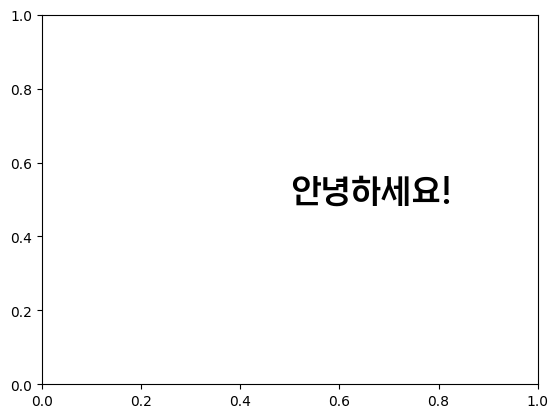

In [ ]:
# 업로드된 파일명 확인 후 경로 설정
font_path = '/content/KBO Dia Gothic_medium.ttf'

# 한글 폰트 설정
font_prop = FontProperties(fname=font_path)

# 예제 텍스트 출력
plt.text(0.5, 0.5, '안녕하세요!', fontproperties=font_prop, fontsize=24)
plt.show()

In [ ]:
font_path = '/content/KBO Dia Gothic_medium.ttf'

# 한글 폰트 설정
font_prop = FontProperties(fname=font_path)

# 폰트 프로퍼티 설정
font_prop = FontProperties(fname=font_path)

# 데이터 병합

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/@KBO_10개구단/KBO_batting_order_2019.csv')
df2 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/@KBO_10개구단/KBO_batting_order_2020.csv')
df3 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/@KBO_10개구단/KBO_batting_order_2021.csv')
df4 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/@KBO_10개구단/KBO_batting_order_2022.csv')
df5 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/@KBO_10개구단/KBO_batting_order_2023.csv')
df1['년도']='2019'
df2['년도']='2020'
df3['년도']='2021'
df4['년도']='2022'
df5['년도']='2023'
df_batting_order= pd.concat([df1, df2, df3, df4, df5], ignore_index=True)
display(df_batting_order.head(), df_batting_order.shape)

,선수명,팀명,타율,타수,안타,2루타,3루타,홈런,타점,볼넷,사구,삼진,병살타,타순,년도
0,이우성,KIA,0.500,4,2,0,0,0,1,1,0,1,0,1번,2019
1,류승현,KIA,0.444,9,4,0,0,0,0,0,0,2,0,1번,2019
2,터커,KIA,0.400,5,2,1,0,0,0,0,0,0,0,1번,2019
3,김주찬,KIA,0.324,105,34,9,0,1,10,9,0,15,0,1번,2019
4,최정용,KIA,0.273,11,3,0,0,0,0,0,0,6,0,1번,2019


(12041, 15)

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/@KBO_10개구단/KBO_hitter_2019.csv')
df2 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/@KBO_10개구단/KBO_hitter_2020.csv')
df3 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/@KBO_10개구단/KBO_hitter_2021.csv')
df4 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/@KBO_10개구단/KBO_hitter_2022.csv')
df5 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/@KBO_10개구단/KBO_hitter_2023.csv')
df1['년도']='2019'
df2['년도']='2020'
df3['년도']='2021'
df4['년도']='2022'
df5['년도']='2023'
df_hitter= pd.concat([df1, df2, df3, df4, df5], ignore_index=True)
display(df_hitter.head(), df_hitter.shape)

,선수명,팀명,타율,경기,타석,타수,득점,안타,2루타,3루타,...,사구,삼진,병살타,장타율,출루율,출루율+장타율,멀티히트,득점권타율,대타타율,년도
0,안치홍,KIA,0.315,105,408,362,45,114,18,1,...,1,37,9,0.412,0.380,0.792,32,0.234,0.200,2019
1,터커,KIA,0.311,95,399,357,50,111,33,0,...,3,44,12,0.479,0.381,0.860,29,0.293,0.000,2019
2,황윤호,KIA,0.301,57,130,123,9,37,5,2,...,0,12,2,0.398,0.326,0.724,7,0.182,0.333,2019
3,최형우,KIA,0.300,136,555,456,65,137,31,1,...,7,77,13,0.485,0.413,0.898,38,0.263,0.000,2019
4,한준수,KIA,0.300,7,20,20,2,6,2,0,...,0,2,2,0.400,0.300,0.700,2,0.400,0.000,2019


(1781, 27)

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/@KBO_10개구단/KBO_runner_2019.csv')
df2 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/@KBO_10개구단/KBO_runner_2020.csv')
df3 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/@KBO_10개구단/KBO_runner_2021.csv')
df4 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/@KBO_10개구단/KBO_runner_2022.csv')
df5 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/@KBO_10개구단/KBO_runner_2023.csv')
df1['년도']='2019'
df2['년도']='2020'
df3['년도']='2021'
df4['년도']='2022'
df5['년도']='2023'
df_runner= pd.concat([df1, df2, df3, df4, df5], ignore_index=True)
display(df_runner.head(), df_runner.shape)

,선수명,팀명,경기,도루시도,도루허용,도루저지,도루성공률,주루사,견제사,년도
0,박찬호,KIA,133,45,39,6,86.7,8,3,2019
1,이창진,KIA,133,16,8,8,50.0,3,1,2019
2,최원준,KIA,90,12,8,4,66.7,4,0,2019
3,김선빈,KIA,121,9,5,4,55.6,5,0,2019
4,안치홍,KIA,105,6,4,2,66.7,5,0,2019


(1842, 10)

In [ ]:
duplicates_hitter = df_hitter[df_hitter.duplicated()]
duplicates_runner = df_runner[df_runner.duplicated()]
duplicates_batting_order = df_batting_order[df_batting_order.duplicated()]
display(duplicates_hitter,duplicates_runner, duplicates_batting_order )

,선수명,팀명,타율,경기,타석,타수,득점,안타,2루타,3루타,...,사구,삼진,병살타,장타율,출루율,출루율+장타율,멀티히트,득점권타율,대타타율,년도
1693,이승현,삼성,-,2,0,0,0,0,0,0,...,0,0,0,-,-,-,0,0.0,0.0,2023


,선수명,팀명,경기,도루시도,도루허용,도루저지,도루성공률,주루사,견제사,년도
1751,이승현,삼성,2,0,0,0,-,0,0,2023


,선수명,팀명,타율,타수,안타,2루타,3루타,홈런,타점,볼넷,사구,삼진,병살타,타순,년도


In [ ]:
# 중복된 데이터 삭제
df_hitter = df_hitter.drop_duplicates()
df_runner = df_runner.drop_duplicates()
df_batting_order = df_batting_order.drop_duplicates()

In [ ]:
# hitter_selected DataFrame 선택
hitter_selected = df_hitter[['선수명', '팀명', '년도', '경기', '고의4구', '희생플라이', '희생번트', '득점권타율']]
# runner_selected DataFrame 선택
runner_selected = df_runner[['선수명', '팀명', '년도', '도루허용', '도루저지']]

# 중복된 데이터 확인
duplicates_hitter_selected = hitter_selected[hitter_selected.duplicated()]
duplicates_runner_selected = runner_selected[runner_selected.duplicated()]

# 결과 출력
print("중복된 hitter_selected 데이터:\n", duplicates_hitter_selected)
print("중복된 runner_selected 데이터:\n", duplicates_runner_selected)

중복된 hitter_selected 데이터:
       선수명  팀명    년도  경기  고의4구  희생플라이  희생번트  득점권타율
1693  이승현  삼성  2023   2     0      0     0    0.0
중복된 runner_selected 데이터:
       선수명  팀명    년도  도루허용  도루저지
1751  이승현  삼성  2023     0     0


In [ ]:
# hitter
hitter_selected = df_hitter[['선수명', '팀명', '년도', '경기', '고의4구', '희생플라이', '희생번트', '득점권타율']]

# runner
runner_selected = df_runner[['선수명', '팀명', '년도', '도루허용', '도루저지']]

# df3에 df1과 df4의 선택된 컬럼들 병합 (df3 = batting order)
# 중복되지 않는 컬럼 이름으로 merge
df = df_batting_order.merge(hitter_selected, on=['선수명', '팀명', '년도'], how='inner') \
        .merge(runner_selected, on=['선수명', '팀명', '년도'], how='inner')

# 1루타 열 계산 (안타 - 2루타 - 3루타 - 홈런)
df['1루타'] = df['안타'] - df['2루타'] - df['3루타'] - df['홈런']

# 결과 출력
df.shape

(10051, 23)

In [ ]:
df = df[df['타수']>= 10]
df.shape

(4990, 23)

In [ ]:
# XR 계산 함수 정의
def calculate_XR(row):
    XR = (row['1루타'] * 0.5 +
          row['2루타'] * 0.72 +
          row['3루타'] * 1.04 +
          row['홈런'] * 1.44 +
          (row['사구'] + row['볼넷'] - row['고의4구']) * 0.34 +
          row['고의4구'] * 0.25 +
          row['도루허용'] * 0.18 -
          row['도루저지'] * 0.32 -
          (row['타수'] - row['안타'] - row['삼진']) * 0.09 -
          row['삼진'] * 0.098 -
          row['병살타'] * 0.37 +
          row['희생플라이'] * 0.37 +
          row['희생번트'] * 0.04)  # 희생번트 값 추가
    return XR

# 각 선수의 XR 계산
df['추정득점'] = df.apply(calculate_XR, axis=1)

# 결과 출력
df.head()

,선수명,팀명,타율,타수,안타,2루타,3루타,홈런,타점,볼넷,...,년도,경기,고의4구,희생플라이,희생번트,득점권타율,도루허용,도루저지,1루타,추정득점
4,이우성,KIA,0.136,22,3,0,0,2,5,2,...,2019,60,0,2,1,0.239,0,0,1,2.704
5,이우성,KIA,0.237,38,9,0,0,4,9,4,...,2019,60,0,2,1,0.239,0,0,5,8.398
6,이우성,KIA,0.088,34,3,0,0,0,1,2,...,2019,60,0,2,1,0.239,0,0,3,-0.304
7,이우성,KIA,0.219,32,7,1,0,0,4,2,...,2019,60,0,2,1,0.239,0,0,6,2.504
10,이우성,KIA,0.222,36,8,1,0,2,7,3,...,2019,60,0,2,1,0.239,0,0,5,4.930


In [ ]:
df['타순'].unique()

array(['5번', '6번', '7번', '8번', '중심(3~5번)', '하위(6~9번)', '2번', '3번',
       '상위(1~2번)', '4번', '1번', '9번', '9번)'], dtype=object)

# 시각화

## 상위(1~2번)

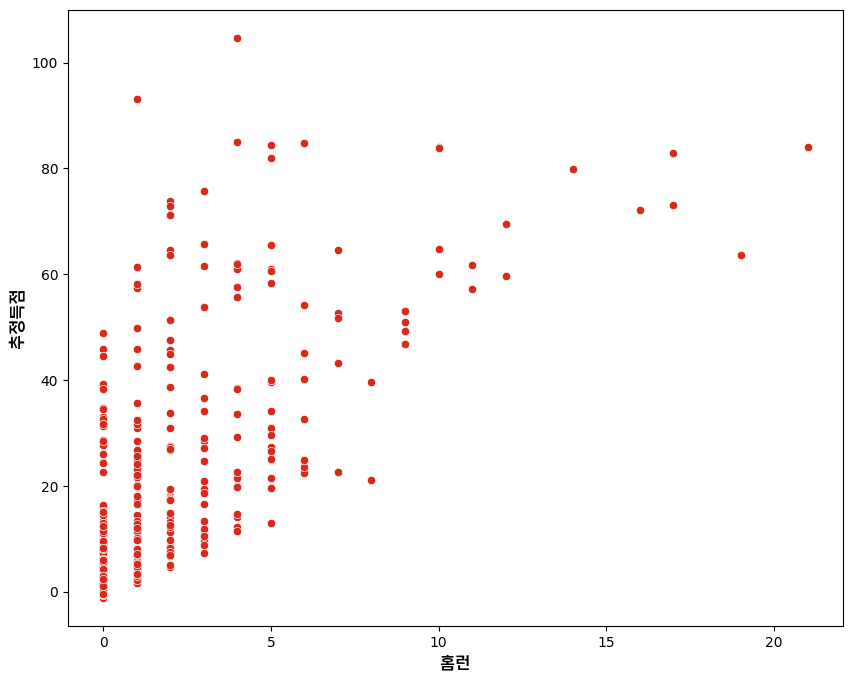

In [ ]:
# '타순'이 '상위(1~2번)'인 데이터 필터링
df_upper = df[df['타순'] == '상위(1~2번)']

# 산점도 그리기
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_upper, x='홈런', y='추정득점', color='#DA291C')
plt.xlabel('홈런', fontsize=12, fontproperties=font_prop)
plt.ylabel('추정득점', fontsize=12, fontproperties=font_prop)
plt.grid(False)
plt.show()

## 1번

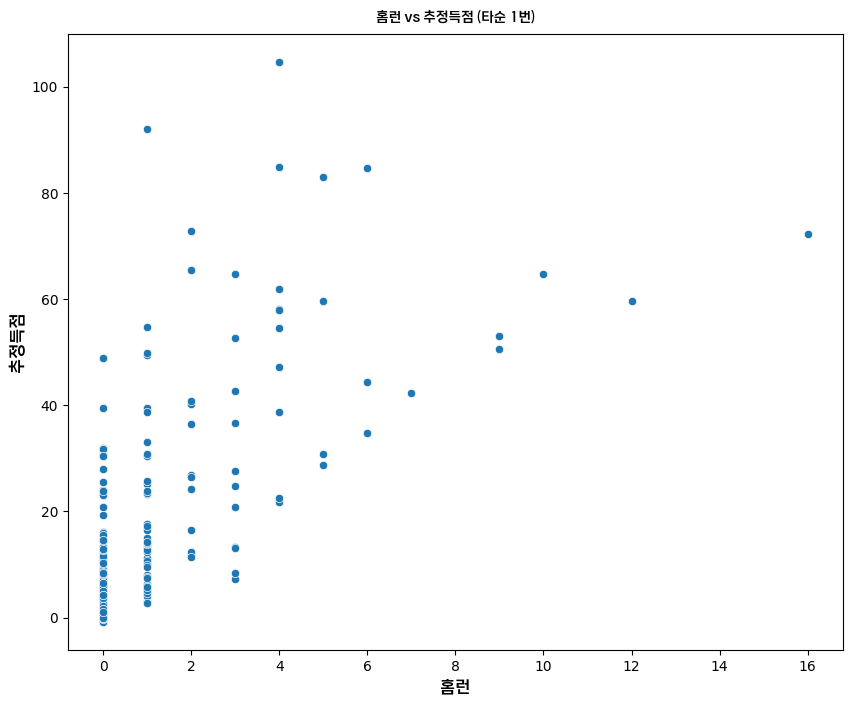

In [ ]:
# '타순'이 '1번'인 데이터 필터링
df_num1 = df[df['타순'] == '1번']

# 산점도 그리기
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_num1, x='홈런', y='추정득점')
plt.title('홈런 vs 추정득점 (타순 1번)', fontsize=10, fontproperties=font_prop, pad=10)
plt.xlabel('홈런', fontsize=12, fontproperties=font_prop)
plt.ylabel('추정득점', fontsize=12, fontproperties=font_prop)
plt.grid(False)
plt.show()

## 2번

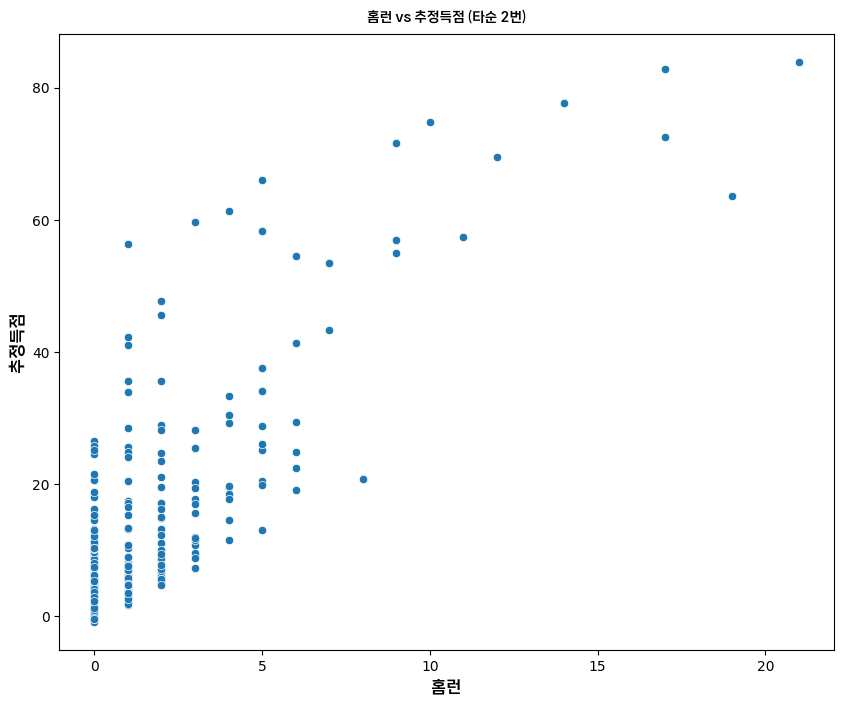

In [ ]:
# '타순'이 '4번'인 데이터 필터링
df_num2 = df[df['타순'] == '2번']

# 산점도 그리기
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_num2, x='홈런', y='추정득점')
plt.title('홈런 vs 추정득점 (타순 2번)', fontsize=10, fontproperties=font_prop, pad=10)
plt.xlabel('홈런', fontsize=12, fontproperties=font_prop)
plt.ylabel('추정득점', fontsize=12, fontproperties=font_prop)
plt.grid(False)
plt.show()

## 중심(3~5번)

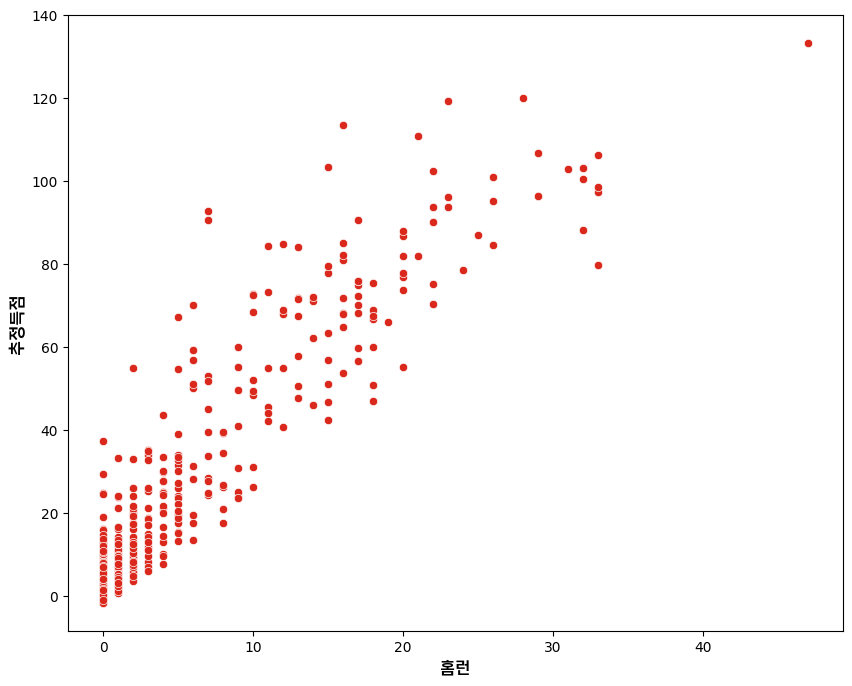

In [ ]:
# '타순'이 '상위(1~2번)'인 데이터 필터링
df_center = df[df['타순'] == '중심(3~5번)']

# 산점도 그리기
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_center, x='홈런', y='추정득점', color='#DA291C')
plt.xlabel('홈런', fontsize=12, fontproperties=font_prop)
plt.ylabel('추정득점', fontsize=12, fontproperties=font_prop)
plt.grid(False)
plt.show()

## 3번

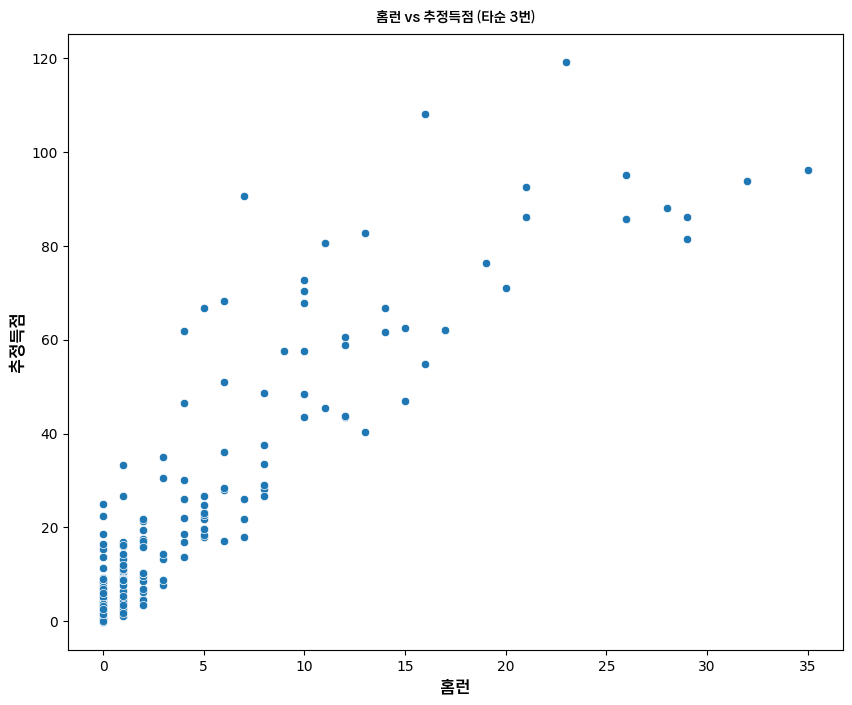

In [ ]:
# '타순'이 '4번'인 데이터 필터링
df_num3 = df[df['타순'] == '3번']

# 산점도 그리기
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_num3, x='홈런', y='추정득점')
plt.title('홈런 vs 추정득점 (타순 3번)', size=20, fontproperties=font_prop, pad=10)
plt.xlabel('홈런', fontsize=12, fontproperties=font_prop)
plt.ylabel('추정득점', fontsize=12, fontproperties=font_prop)
plt.grid(False)
plt.show()

## 4번

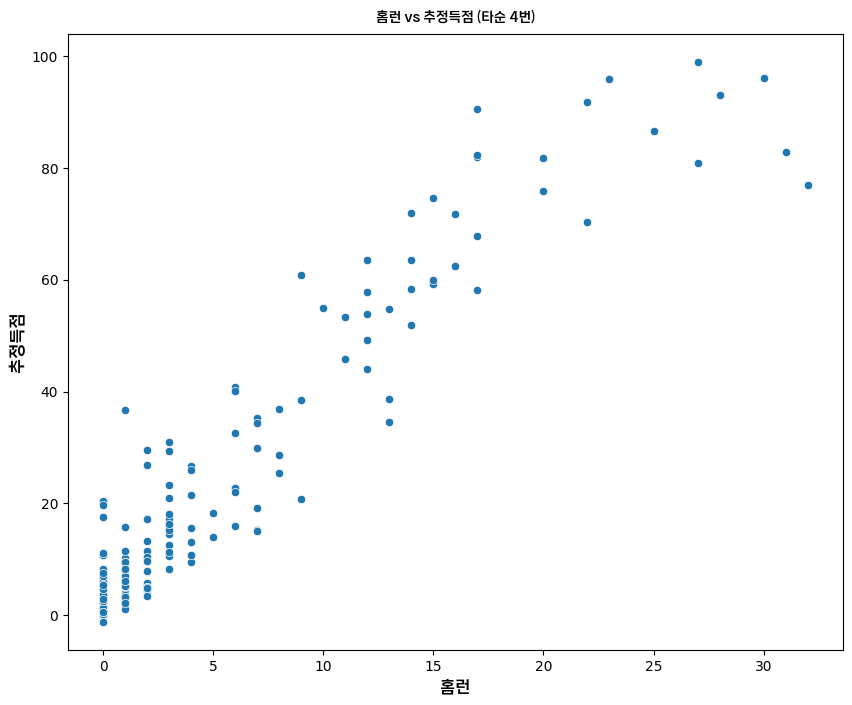

In [ ]:
# '타순'이 '4번'인 데이터 필터링
df_num4 = df[df['타순'] == '4번']

# 산점도 그리기
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_num4, x='홈런', y='추정득점')
plt.title('홈런 vs 추정득점 (타순 4번)', size=20, fontproperties=font_prop, pad=10)
plt.xlabel('홈런', fontsize=12, fontproperties=font_prop)
plt.ylabel('추정득점', fontsize=12, fontproperties=font_prop)
plt.grid(False)
plt.show()

## 5번

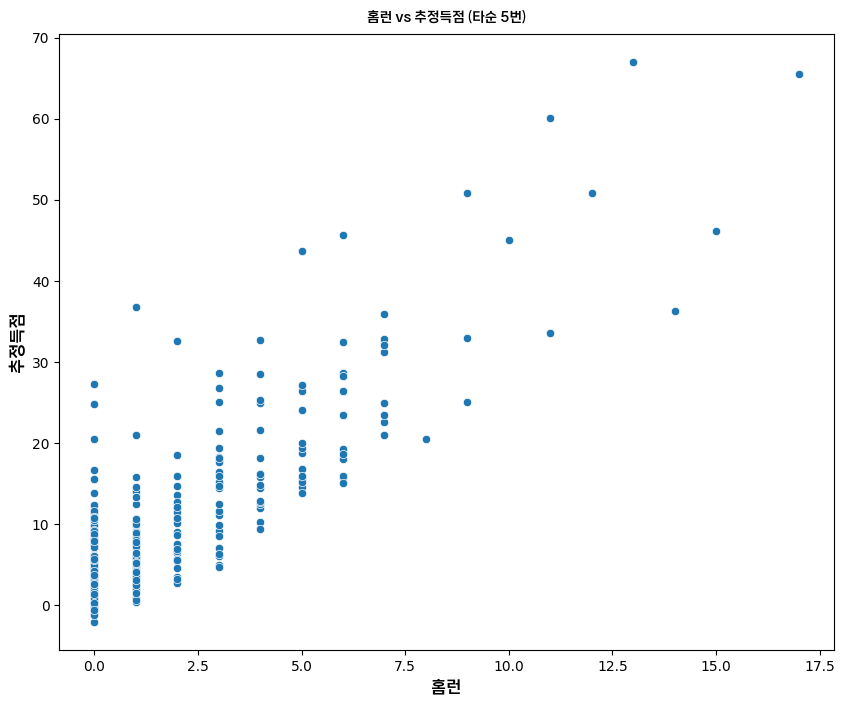

In [ ]:
# '타순'이 '4번'인 데이터 필터링
df_num5 = df[df['타순'] == '5번']

# 산점도 그리기
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_num5, x='홈런', y='추정득점')
plt.title('홈런 vs 추정득점 (타순 5번)', fontsize=10, fontproperties=font_prop, pad=10)
plt.xlabel('홈런', fontsize=12, fontproperties=font_prop)
plt.ylabel('추정득점', fontsize=12, fontproperties=font_prop)
plt.grid(False)
plt.show()

## 하위(6~9번)

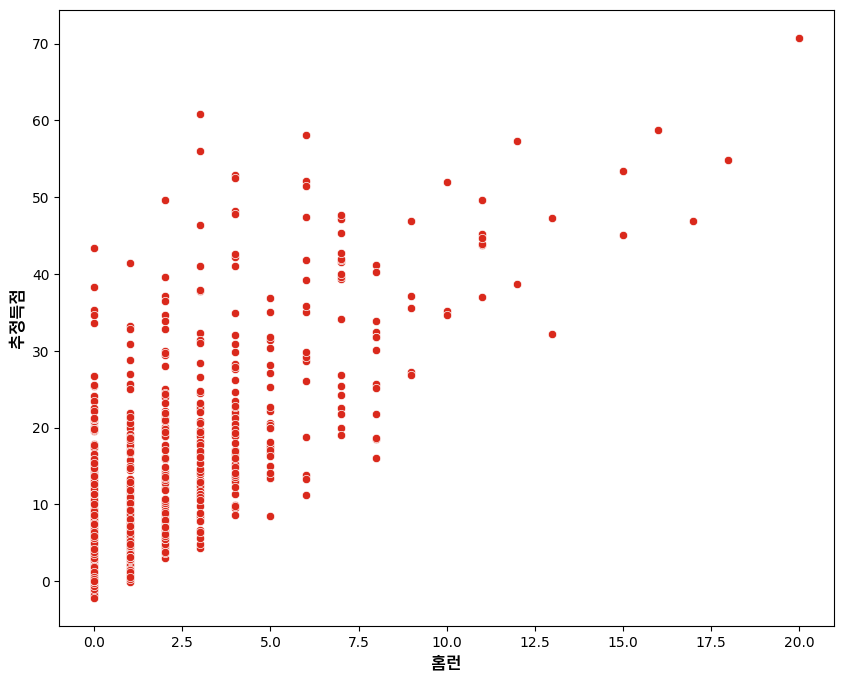

In [ ]:
# '타순'이 '하위(6~9번)'인 데이터 필터링
df_lower = df[df['타순'] == '하위(6~9번)']

# 산점도 그리기
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_lower, x='홈런', y='추정득점', color='#DA291C')
plt.xlabel('홈런', fontsize=12, fontproperties=font_prop)
plt.ylabel('추정득점', fontsize=12, fontproperties=font_prop)
plt.grid(False)
plt.show()

## 6번

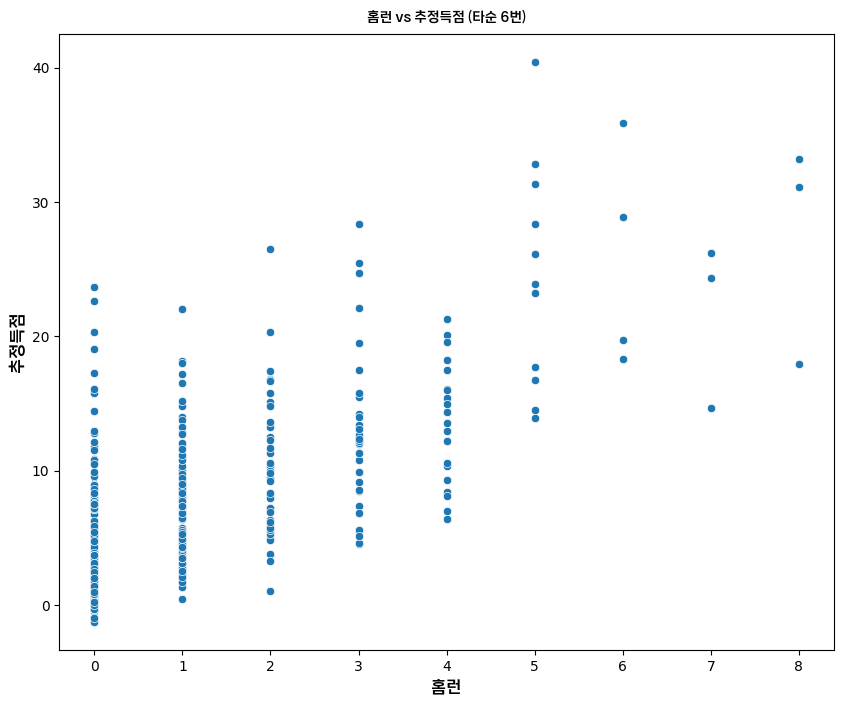

In [ ]:
# '타순'이 '6번'인 데이터 필터링
df_num6 = df[df['타순'] == '6번']

# 산점도 그리기
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_num6, x='홈런', y='추정득점')
plt.title('홈런 vs 추정득점 (타순 6번)', fontsize=10, fontproperties=font_prop, pad=10)
plt.xlabel('홈런', fontsize=12, fontproperties=font_prop)
plt.ylabel('추정득점', fontsize=12, fontproperties=font_prop)
plt.grid(False)
plt.show()

## 7번

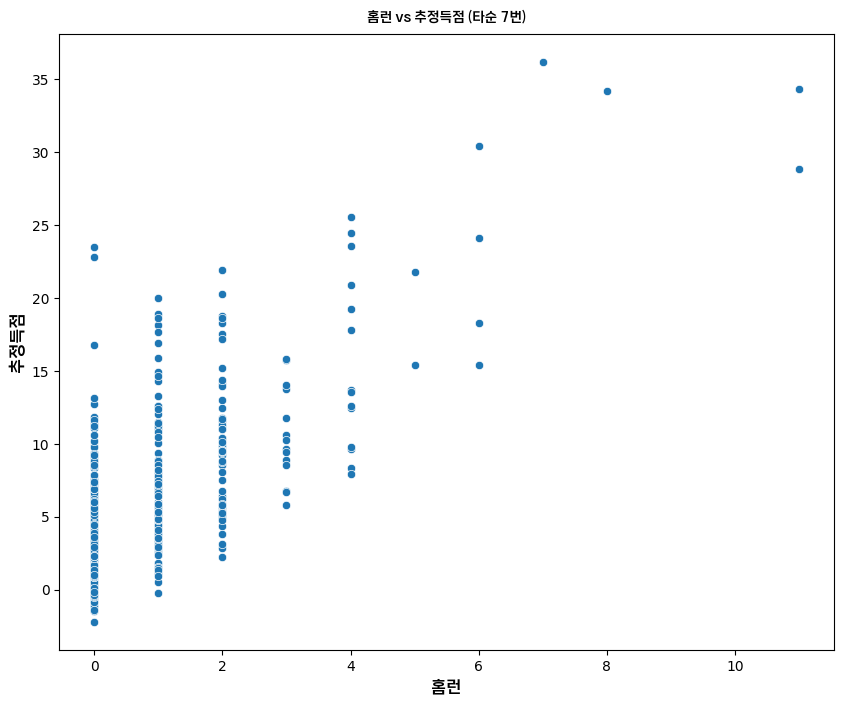

In [ ]:
# '타순'이 '7번'인 데이터 필터링
df_num7 = df[df['타순'] == '7번']

# 산점도 그리기
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_num7, x='홈런', y='추정득점')
plt.title('홈런 vs 추정득점 (타순 7번)', fontsize=10, fontproperties=font_prop, pad=10)
plt.xlabel('홈런', fontsize=12, fontproperties=font_prop)
plt.ylabel('추정득점', fontsize=12, fontproperties=font_prop)
plt.grid(False)
plt.show()

## 8번

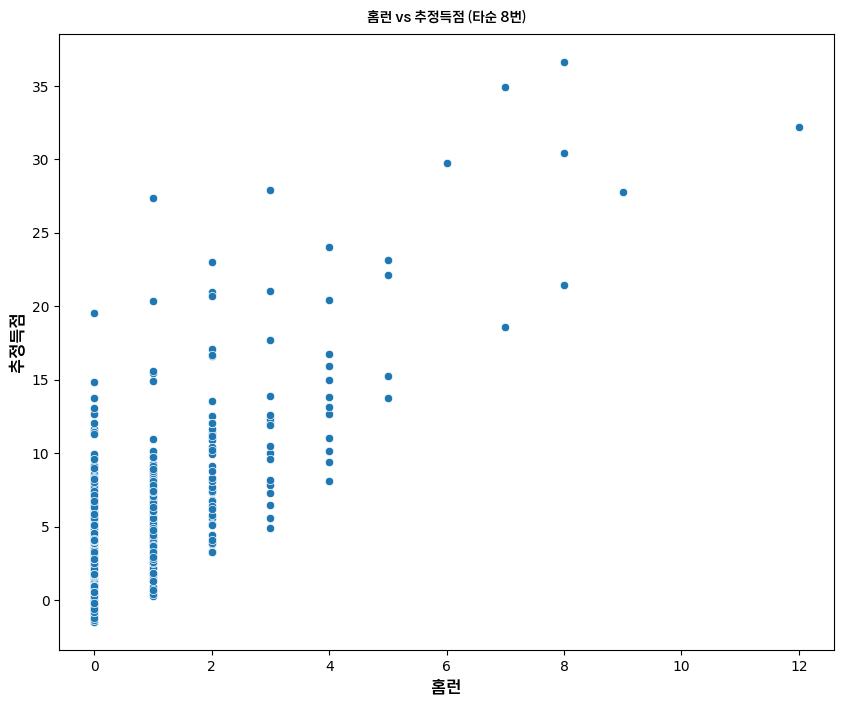

In [ ]:
# '타순'이 '8번'인 데이터 필터링
df_num8 = df[df['타순'] == '8번']

# 산점도 그리기
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_num8, x='홈런', y='추정득점')
plt.title('홈런 vs 추정득점 (타순 8번)', fontsize=10, fontproperties=font_prop, pad=10)
plt.xlabel('홈런', fontsize=12, fontproperties=font_prop)
plt.ylabel('추정득점', fontsize=12, fontproperties=font_prop)
plt.grid(False)
plt.show()

## 9번

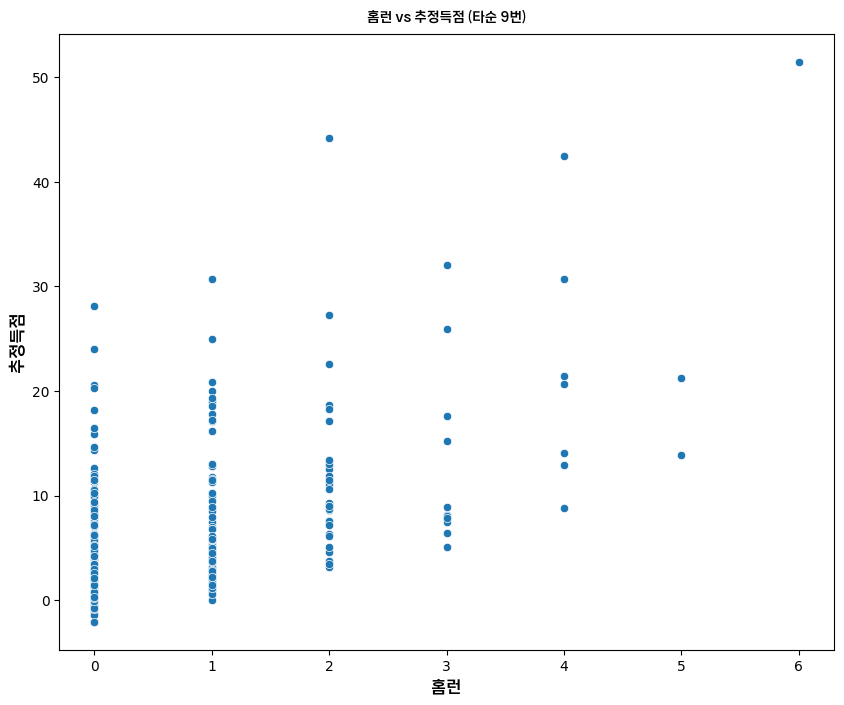

In [ ]:
# '타순'이 '9번'인 데이터 필터링
df_num9 = df[df['타순'] == '9번']

# 산점도 그리기
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_num9, x='홈런', y='추정득점')
plt.title('홈런 vs 추정득점 (타순 9번)', fontsize=10, fontproperties=font_prop, pad=10)
plt.xlabel('홈런', fontsize=12, fontproperties=font_prop)
plt.ylabel('추정득점', fontsize=12, fontproperties=font_prop)
plt.grid(False)
plt.show()